# Veri Madenciliği Ödevi - Bahar 2018
# Remzi Meriç Ceylan

___

## 1.Özet

Projenin temel kısımları, veri tanımlama, algoritma tanıtımı ve modellemesi yapıldı,. Veri katagorik olduğu için gruplama yapmakta zorlanıldı ve parametre seçimi, yorumlama yapılamadı. 

## 2.Giriş

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from IPython.display import Math, Latex
import matplotlib.pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
flags = pd.read_csv("flags.csv", header=None)
flags.columns = list(range(1,31))
flags.index = flags[1]
del flags[1]
flags.head(10)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue


In [3]:
def enumerate_dataframe(df):
    for column in df:
        if type(df[column][0]) == np.int64:
            pass
        else:
            print("Column Name: ",df[column].name)
            print(df[column].unique())
            key=[]
            value=[]
            for v, k in enumerate(df[column].unique()):
                key.append(k)
                value.append(v)
                print(k,"\t", v)
            print("\n")     
            df[column] = df[column].map(dict(zip(key, value)))
    return df

In [4]:
flags = enumerate_dataframe(flags)

Column Name:  18
['green' 'red' 'blue' 'gold' 'white' 'orange' 'black' 'brown']
green 	 0
red 	 1
blue 	 2
gold 	 3
white 	 4
orange 	 5
black 	 6
brown 	 7


Column Name:  29
['black' 'red' 'green' 'blue' 'white' 'orange' 'gold']
black 	 0
red 	 1
green 	 2
blue 	 3
white 	 4
orange 	 5
gold 	 6


Column Name:  30
['green' 'red' 'white' 'black' 'blue' 'gold' 'orange' 'brown']
green 	 0
red 	 1
white 	 2
black 	 3
blue 	 4
gold 	 5
orange 	 6
brown 	 7




In [5]:
flags.columns = [
"landmass",
"zone",
"area_km2",
"population",
"language",
"religion",
"bars_count",
"stripes_count",
"colours_count",
"red_exist",
"green_exist",
"blue_exist",
"gold_yellow_exist",
"white_exist",
"black_exist",
"orange_brown_exist",
"mainhue_predominant_colour",
"circles_count",
"crosses_count",
"saltires_count",
"quarters_count",
"sunstars_count",
"crescent_exist",
"triangle_exist",
"icon_exist",
"animate_exist",          
"text_exist",
"topleft_colour",             
"botleft_colour"
]

flags.index.name = "country_name"

In [6]:
"""
landmass                   -> 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
zone                       -> 1=NE, 2=SE, 3=SW, 4=NW
language                   -> 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 
                           9=Japanese/Turkish/Finnish/Magyar, 10=Others
religion                   -> 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
mainhue_predominant_colour -> green=0, red=1, blue=2, gold=3, white=4, orange=5, black=6, brown=7
topleft colour             -> black=0, red=1, green=2, blue=3, white=4, orange=5, gold=6
botleft_colour             -> green=0, red=1, white=2, black=3, blue=4, gold=5, orange=6, brown=7
"""
flags.head(10)

,landmass,zone,area_km2,population,language,religion,bars_count,stripes_count,colours_count,red_exist,green_exist,blue_exist,gold_yellow_exist,white_exist,black_exist,orange_brown_exist,mainhue_predominant_colour,circles_count,crosses_count,saltires_count,quarters_count,sunstars_count,crescent_exist,triangle_exist,icon_exist,animate_exist,text_exist,topleft_colour,botleft_colour
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,2,2
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,2,0,0,0,0,0,0,1,1,1,0,3,1
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,1
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,3
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,4,0,0,0,0,0,0,0,0,1,0,4,4
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,3,4


## 3.Verinin Tanımı

Title: Flag database

Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
      Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

Number of Instances: 194

Number of attributes: 30 (overall)

Attribute Information:

1. name	Name of the country concerned
2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
3. zone	Geographic quadrant, based on Greenwich and the Equator
                1=NE, 2=SE, 3=SW, 4=NW
4. area	in thousands of square km
5. population	in round millions
6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other 
               Indo-European, 7=Chinese, 8=Arabic, 
               9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
               5=Ethnic, 6=Marxist, 7=Others
8. bars     Number of vertical bars in the flag
9. stripes  Number of horizontal stripes in the flag
10. colours  Number of different colours in the flag
11. red      0 if red absent, 1 if red present in the flag
12. green    same for green
13. blue     same for blue
14. gold     same for gold (also yellow)
15. white    same for white
16. black    same for black
17. orange   same for orange (also brown)
18. mainhue  predominant colour in the flag (tie-breaks decided by taking
               the topmost hue, if that fails then the most central hue,
               and if that fails the leftmost hue)
            (green=0, red=1, blue=2, gold=3, white=4, orange=5, black=6, brown=7)
19. circles  Number of circles in the flag
20. crosses  Number of (upright) crosses
21. saltires Number of diagonal crosses
22. quarters Number of quartered sections
23. sunstars Number of sun or star symbols
24. crescent 1 if a crescent moon symbol present, else 0
25. triangle 1 if any triangles present, 0 otherwise
26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand)
               present, 0 otherwise
28. text     1 if any letters or writing on the flag (e.g., a motto or
               slogan), 0 otherwise
29. topleft  colour in the top-left corner (moving right to decide 
               tie-breaks)
               (black=0, red=1, green=2, blue=3, white=4, orange=5, gold=6)
30. botright Colour in the bottom-left corner (moving left to decide 
               tie-breaks)
               (green=0, red=1, white=2, black=3, blue=4, gold=5, orange=6, brown=7)

Missing values: None

"""
1. country_name
2. landmass
3. zone
4. area_km2
5. population
6. language
7. religion
8. bars_count
9. stripes_count
10. colours_count
11. red_exist
12. green_exist
13. blue_exist
14. gold_yellow_exist
15. white_exist
16. black_exist
17. orange_brown_exist
18. mainhue_predominant_colour
19. circles_count
20. crosses_count
21. saltires_count
22. quarters_count
23. sunstars_count
24. crescent_exist
25. triangle_exist
26. icon_exist
27. animate_exist          
28. text_exist
29. topleft_colour             
30. botleft_colour
"""

## 4.Yöntemler

### 4.1 KMeans

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean \mu_j of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

### 4.2 DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm.

### 4.3 AgglomerativeClustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See the Wikipedia page for more details.

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

    Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
    Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
    Average linkage minimizes the average of the distances between all observations of pairs of clusters.

AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

## 5.Deneyler

### 5.1 Algoritmaların Sonuç Karşılaştırma Deneyleri

In [8]:
"""
landmass                   -> 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
zone                       -> 1=NE, 2=SE, 3=SW, 4=NW
language                   -> 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 
                           9=Japanese/Turkish/Finnish/Magyar, 10=Others
religion                   -> 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
mainhue_predominant_colour -> green=0, red=1, blue=2, gold=3, white=4, orange=5, black=6, brown=7
topleft colour             -> black=0, red=1, green=2, blue=3, white=4, orange=5, gold=6
botleft_colour             -> green=0, red=1, white=2, black=3, blue=4, gold=5, orange=6, brown=7
"""
flags.head()

,landmass,zone,area_km2,population,language,religion,bars_count,stripes_count,colours_count,red_exist,green_exist,blue_exist,gold_yellow_exist,white_exist,black_exist,orange_brown_exist,mainhue_predominant_colour,circles_count,crosses_count,saltires_count,quarters_count,sunstars_count,crescent_exist,triangle_exist,icon_exist,animate_exist,text_exist,topleft_colour,botleft_colour
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,2,2
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,2,0,0,0,0,0,0,1,1,1,0,3,1
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,1


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(flags.iloc[:, :])

In [10]:
X_std.shape

(194, 29)

### KMeans

In [11]:
def my_kmeans(col, cn):
    kmeans = KMeans(n_clusters=cn)
    kmeans.fit(X_std)
    y_kmeans = kmeans.predict(X_std)

    plt.figure(figsize=(22,10))
    plt.xticks(rotation=60, size=9)
    #plt.xlabel('my x label', size = 20)
    plt.scatter(flags.index, X_std[:, col], c=y_kmeans, s=70,alpha=0.5)

    #centers = kmeans.cluster_centers_
    #plt.scatter(centers[:, 0], centers[:, 5], s=200, alpha=0.5);

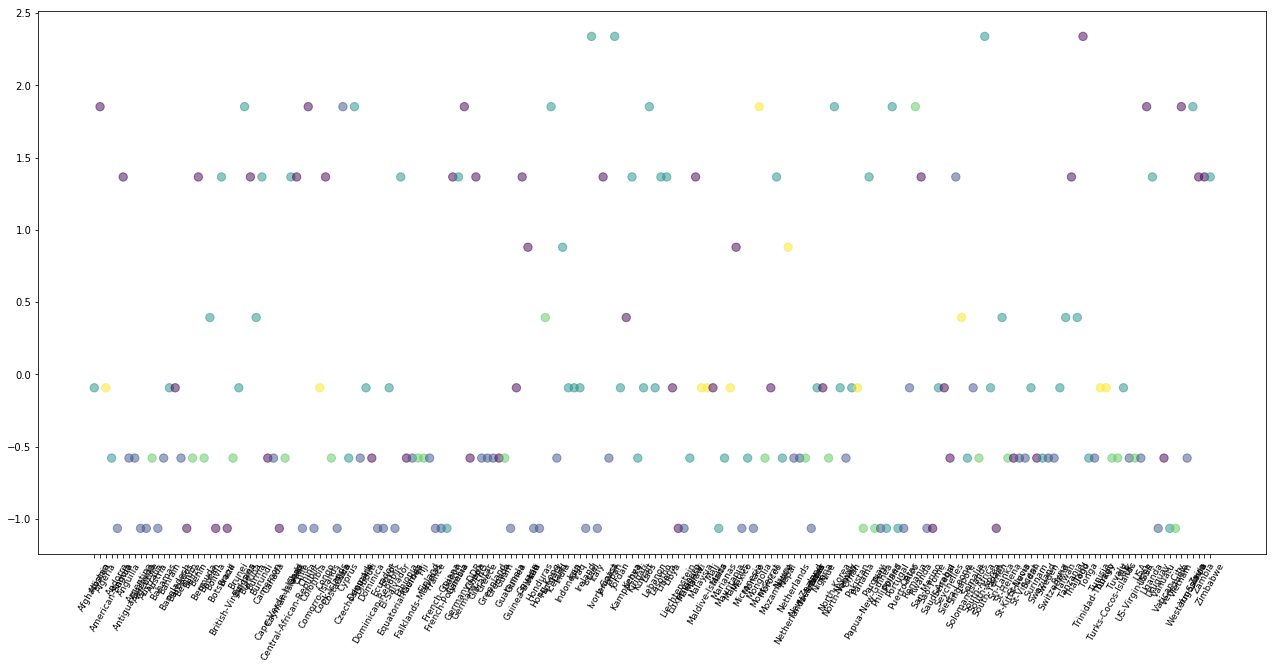

In [12]:
my_kmeans(5,5)

### DBSCAN

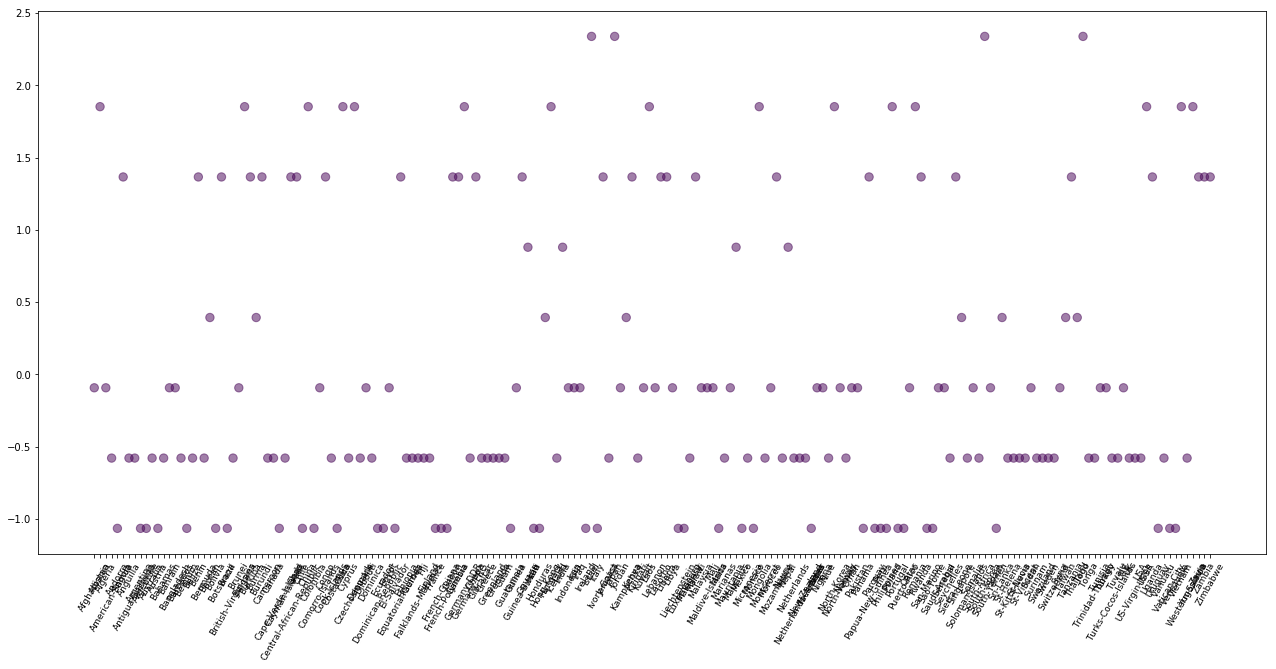

In [13]:
db = DBSCAN( metric='euclidean', min_samples=50)
db.fit(X_std)
labels = db.labels_

plt.figure(figsize=(22,10))
plt.xticks(rotation=60, size=9)
#plt.xlabel('my x label', size = 20)
plt.scatter(flags.index, X_std[:, 5], c=labels, s=70,alpha=0.5)

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 5], s=200, alpha=0.5);

In [14]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1])

### AgglomerativeClustering

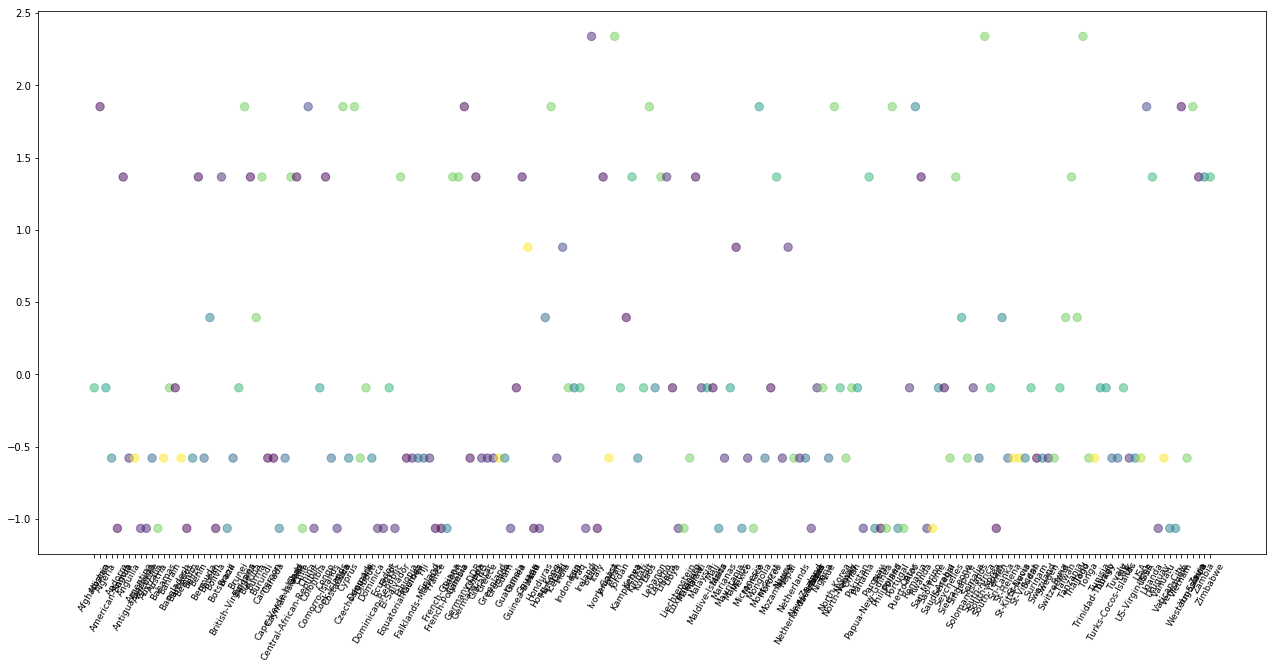

In [15]:
clt = AgglomerativeClustering(linkage='ward', 
                              affinity='euclidean', 
                              n_clusters=10)

model = clt.fit(X_std)
labels = model.labels_

plt.figure(figsize=(22,10))
plt.xticks(rotation=60, size=9)
#plt.xlabel('my x label', size = 20)
plt.scatter(flags.index, X_std[:, 5], c=labels, s=70,alpha=0.5)

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 5], s=200, alpha=0.5);

### 5.2 KMeans Parametre Deneyleri

### 5.2 ... Parametre Deneyleri

In [16]:
"""
landmass                   -> 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
zone                       -> 1=NE, 2=SE, 3=SW, 4=NW
language                   -> 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 
                           9=Japanese/Turkish/Finnish/Magyar, 10=Others
religion                   -> 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
mainhue_predominant_colour -> green=0, red=1, blue=2, gold=3, white=4, orange=5, black=6, brown=7
topleft colour             -> black=0, red=1, green=2, blue=3, white=4, orange=5, gold=6
botleft_colour             -> green=0, red=1, white=2, black=3, blue=4, gold=5, orange=6, brown=7
"""
flags.head()

,landmass,zone,area_km2,population,language,religion,bars_count,stripes_count,colours_count,red_exist,green_exist,blue_exist,gold_yellow_exist,white_exist,black_exist,orange_brown_exist,mainhue_predominant_colour,circles_count,crosses_count,saltires_count,quarters_count,sunstars_count,crescent_exist,triangle_exist,icon_exist,animate_exist,text_exist,topleft_colour,botleft_colour
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,2,2
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,2,0,0,0,0,0,0,1,1,1,0,3,1
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


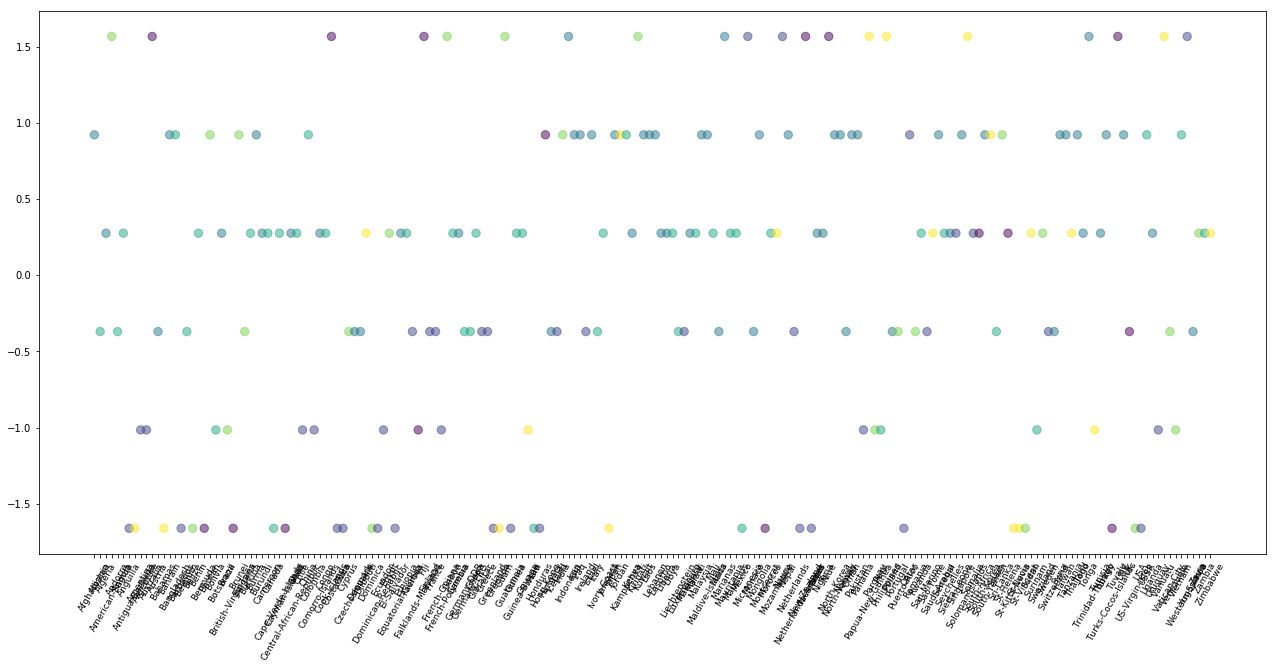

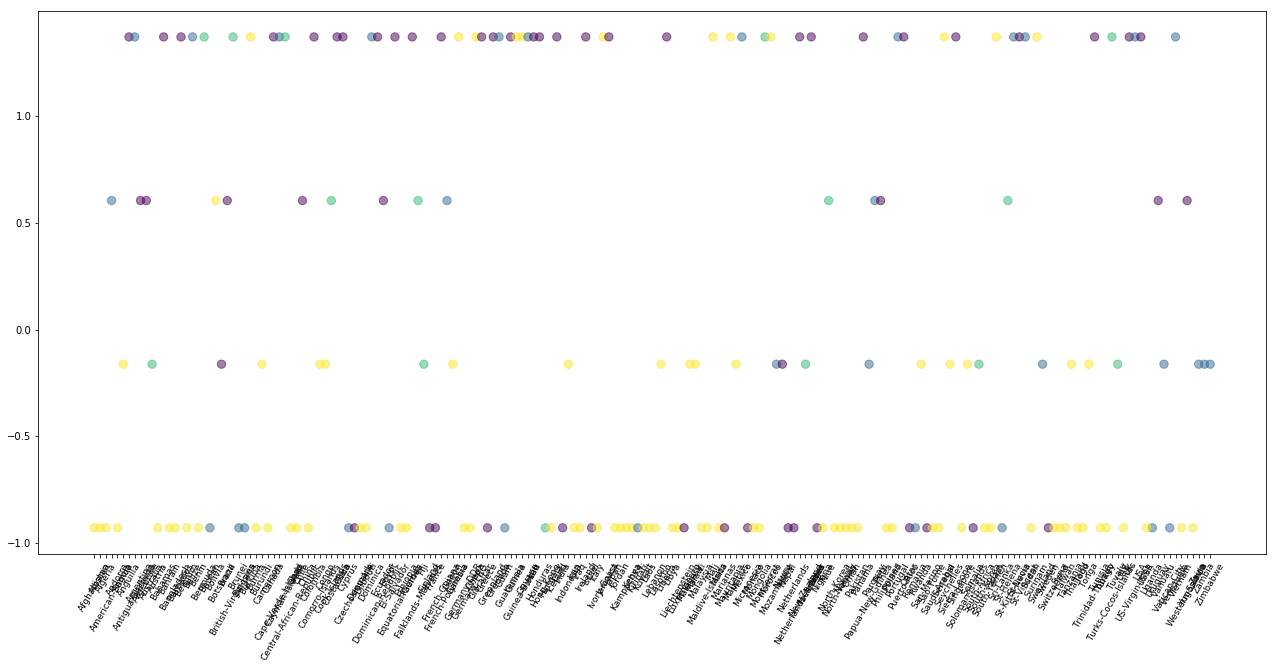

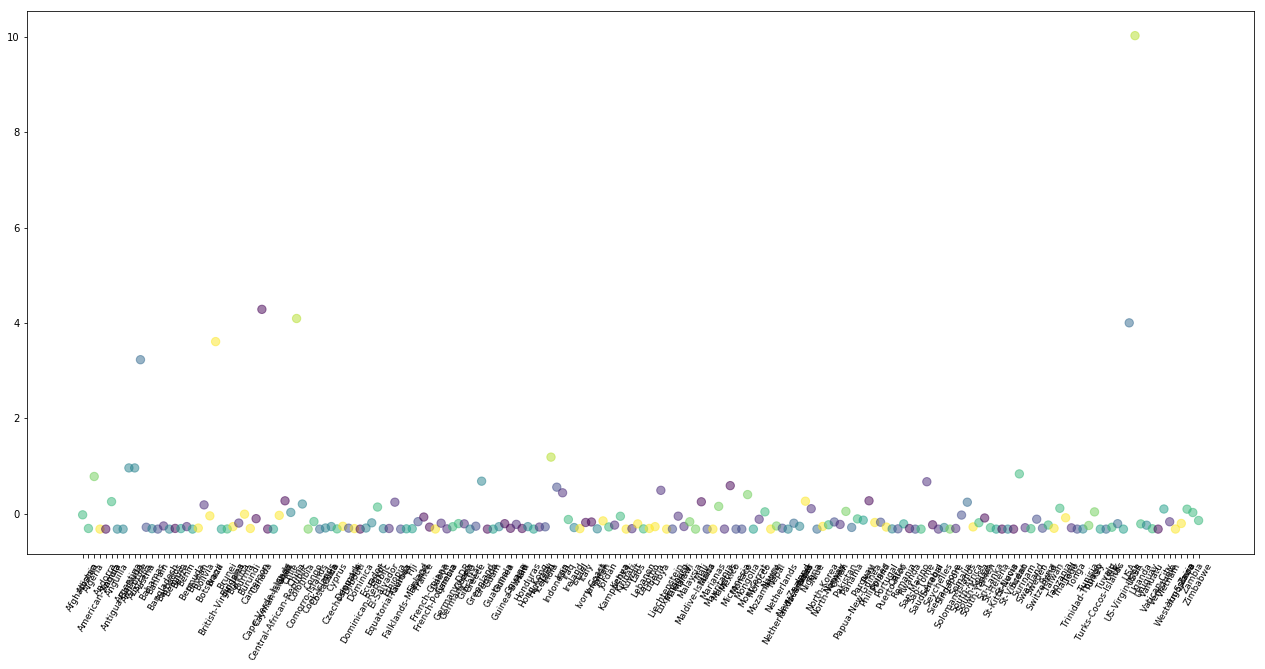

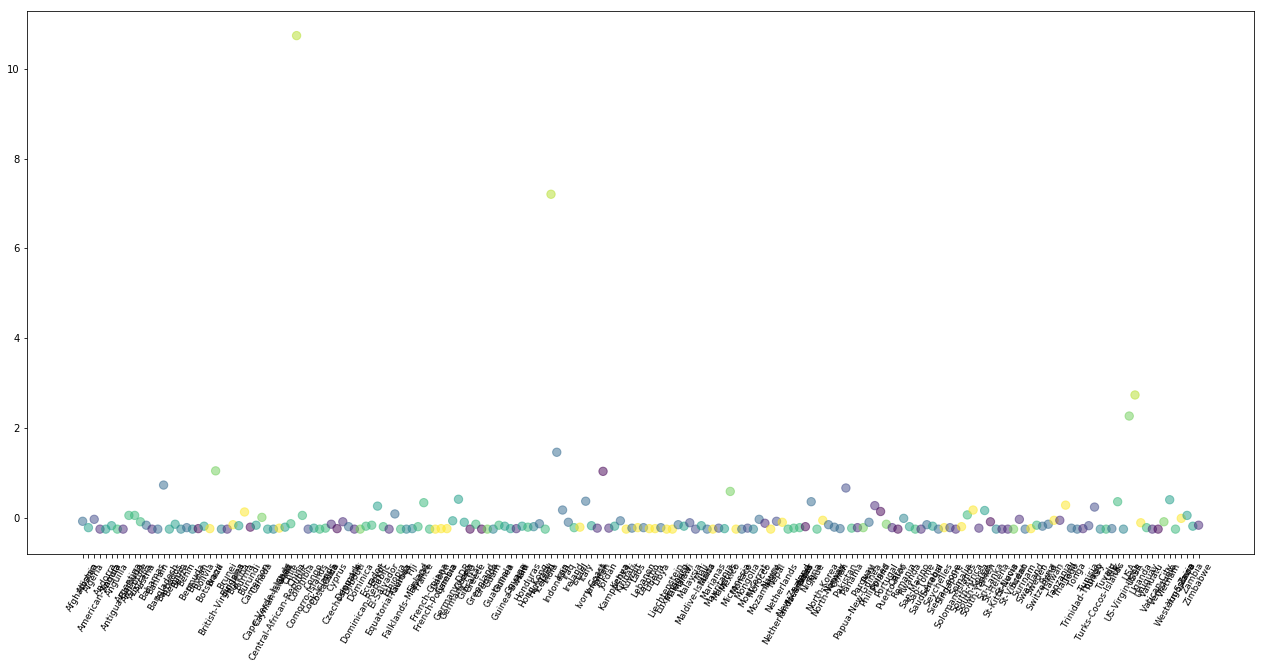

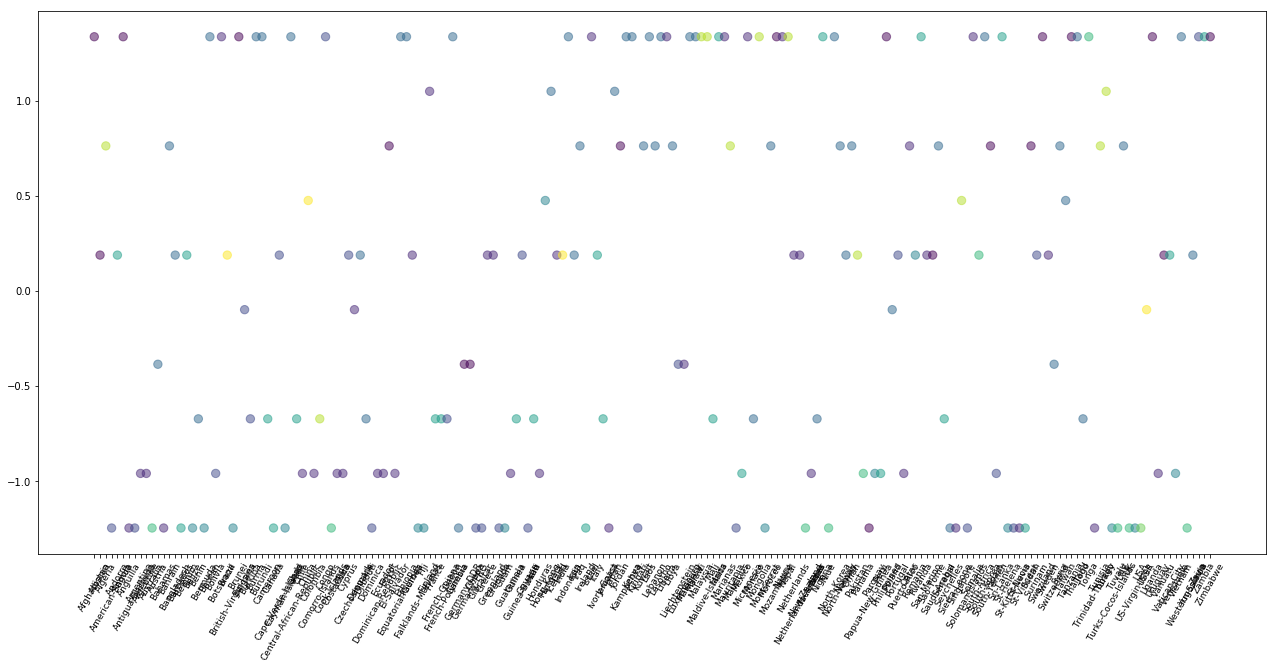

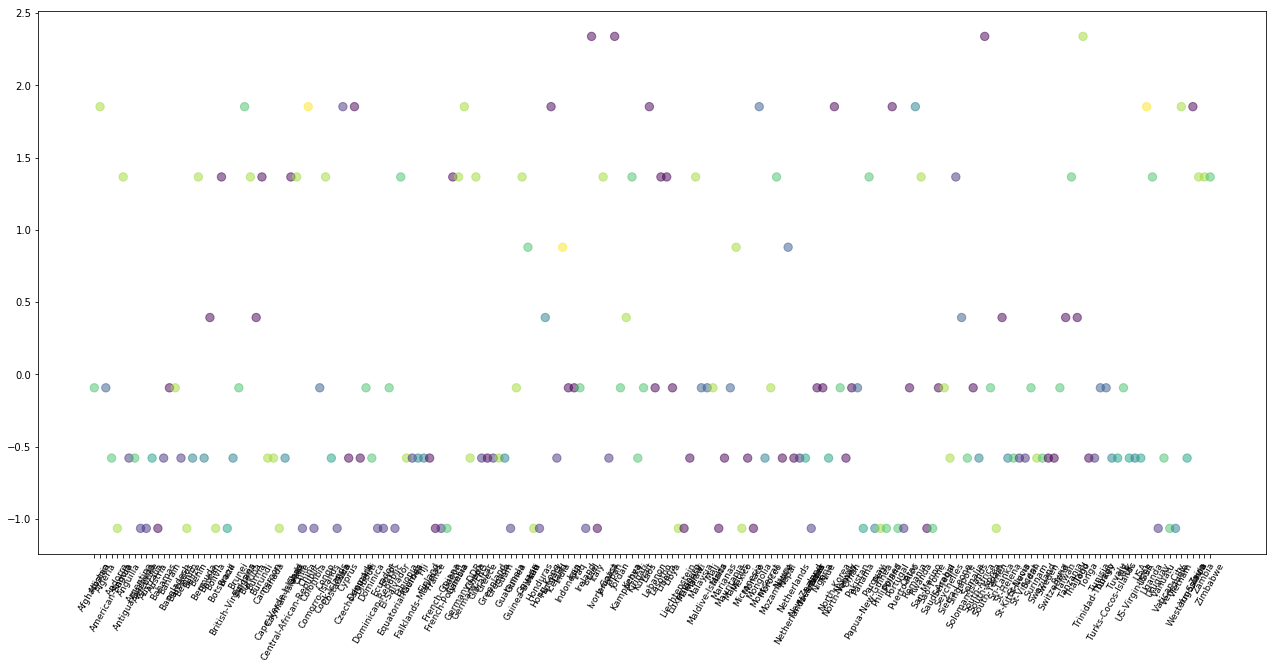

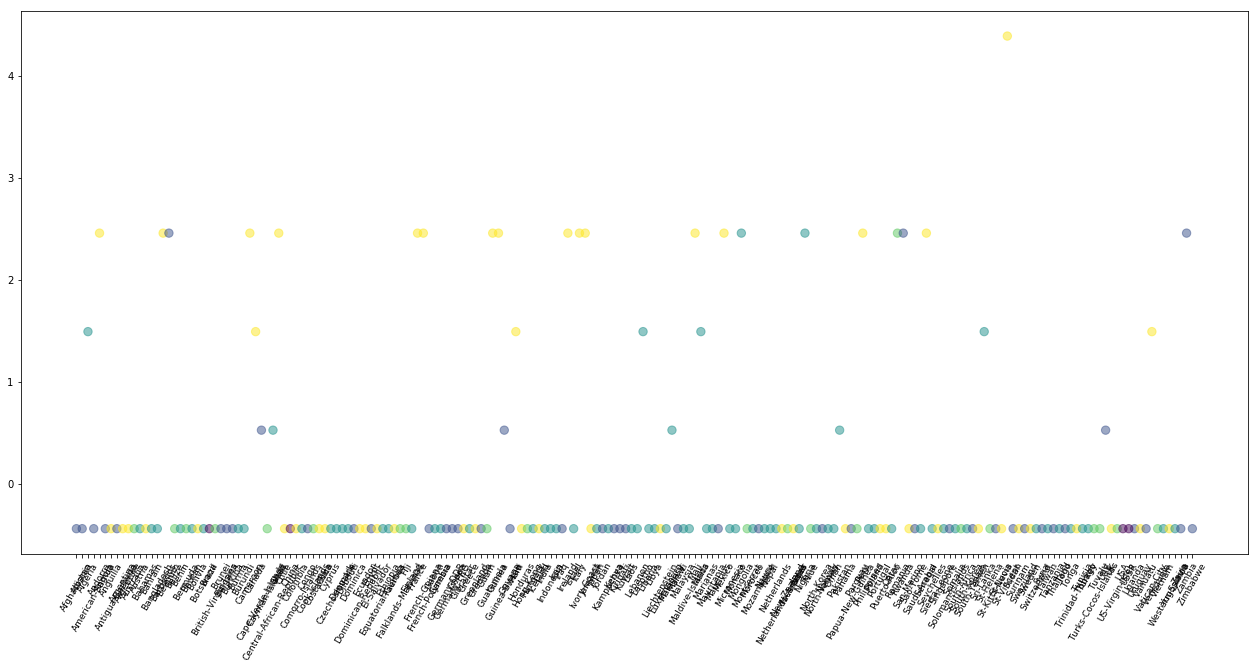

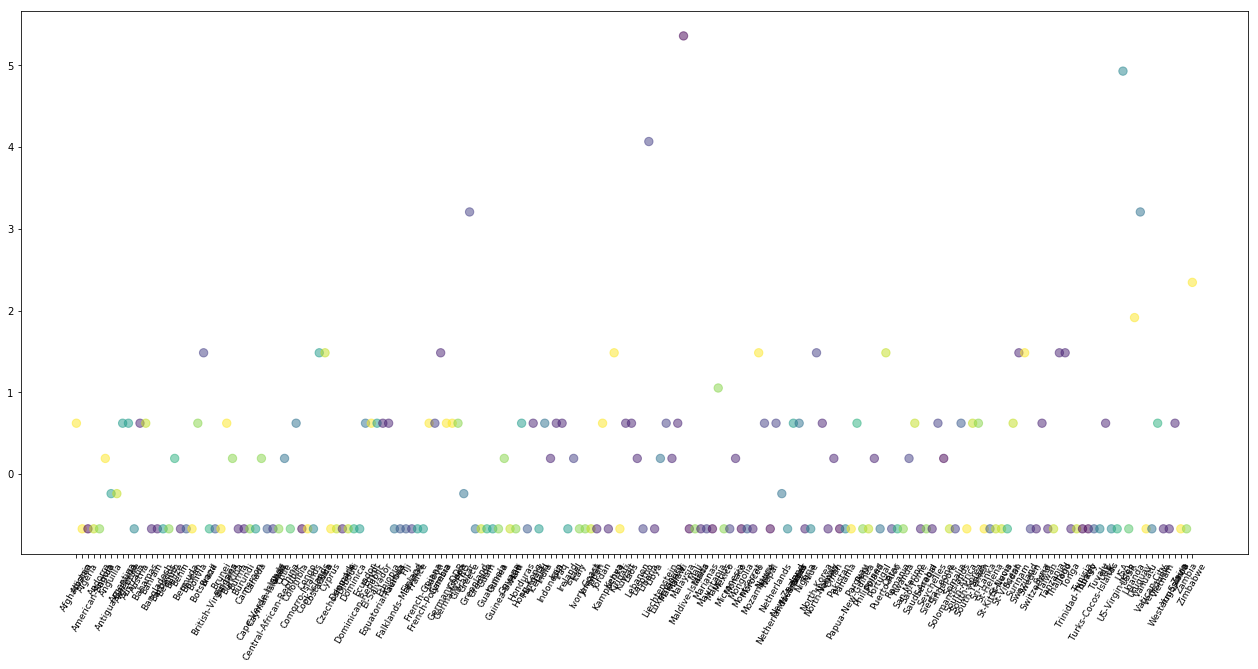

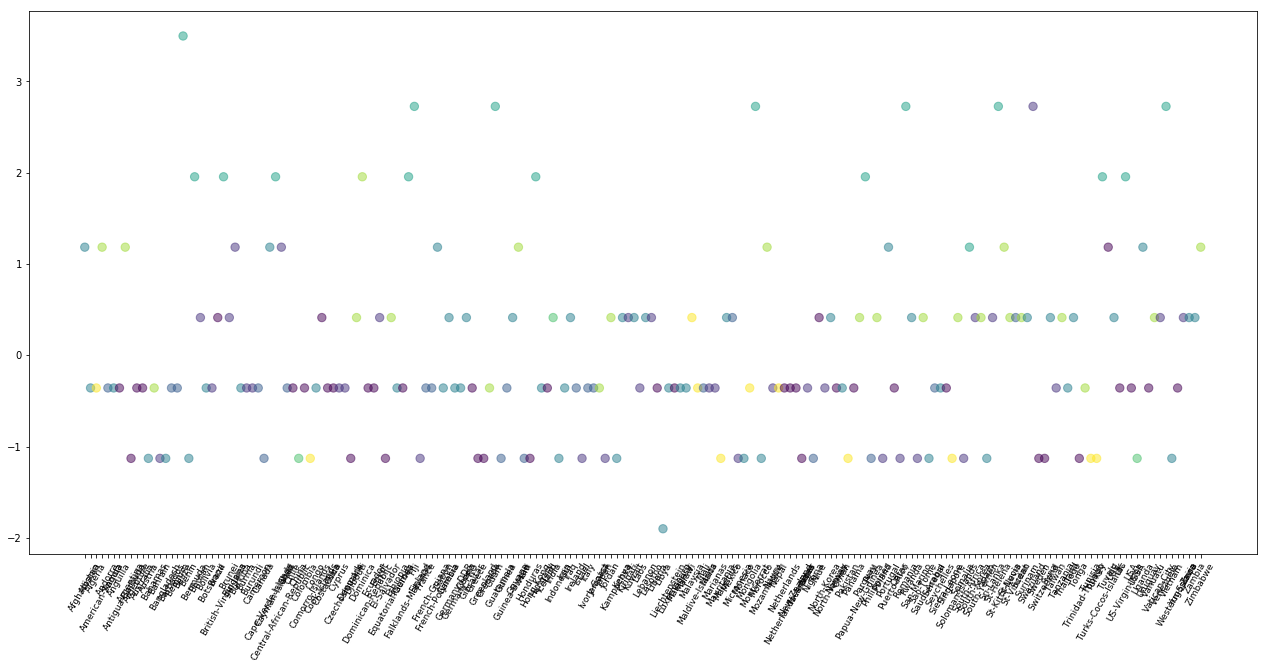

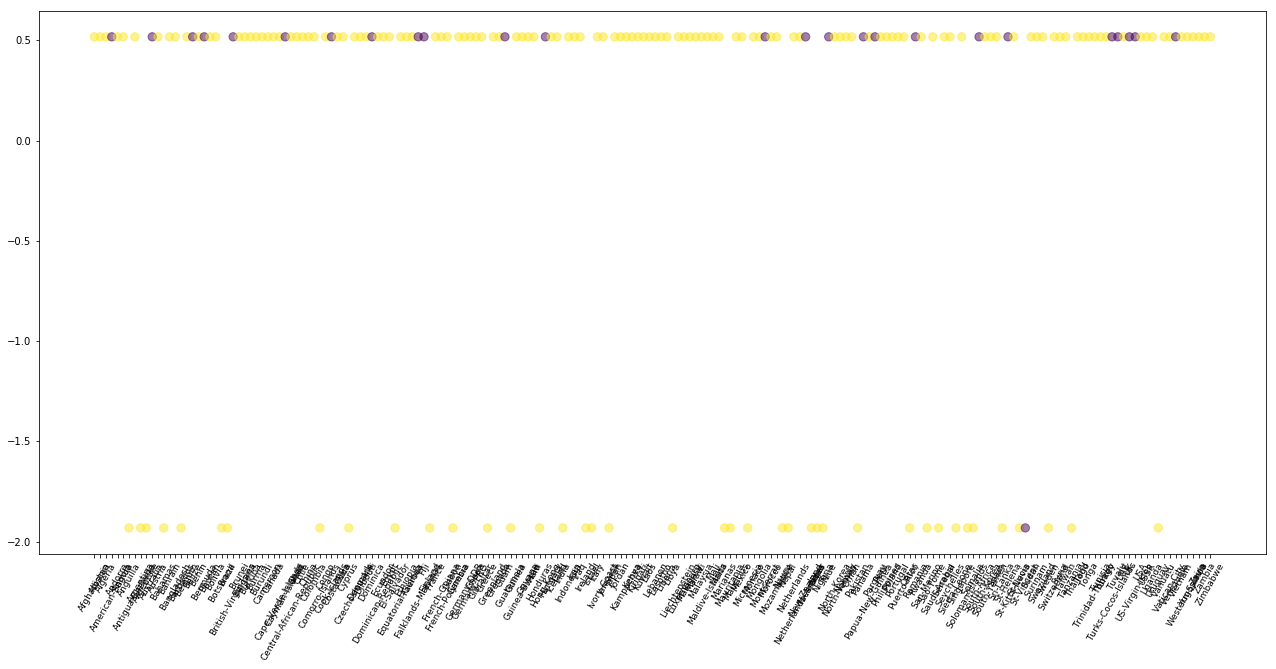

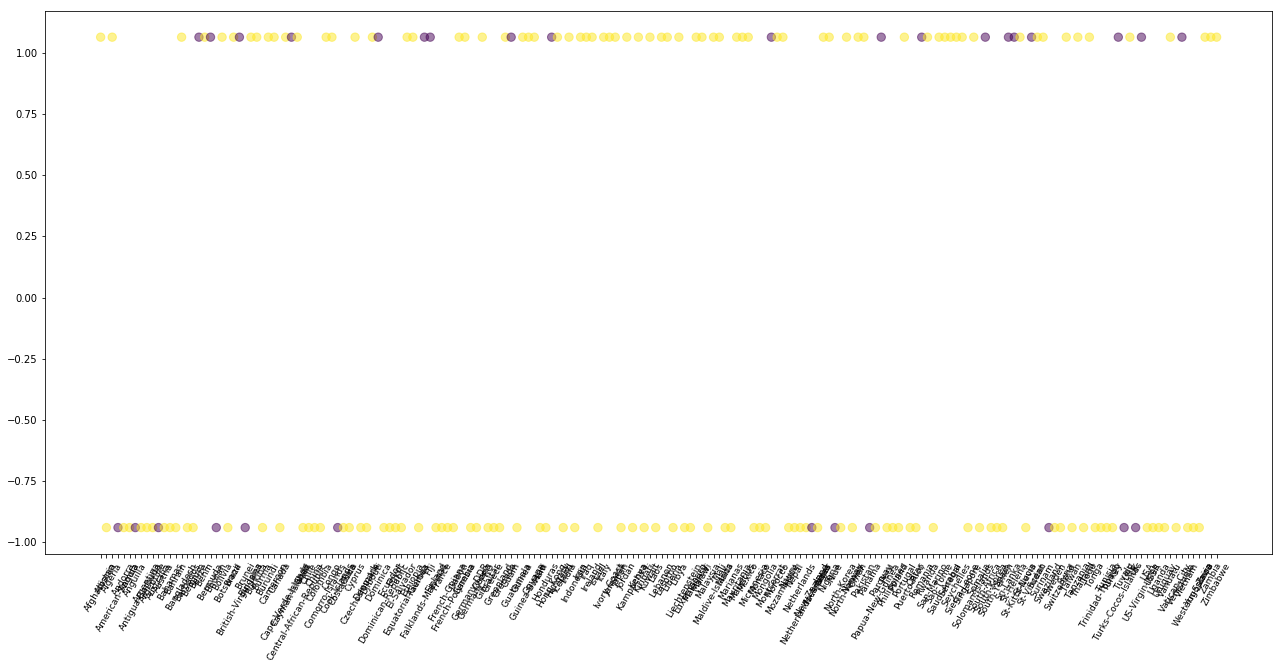

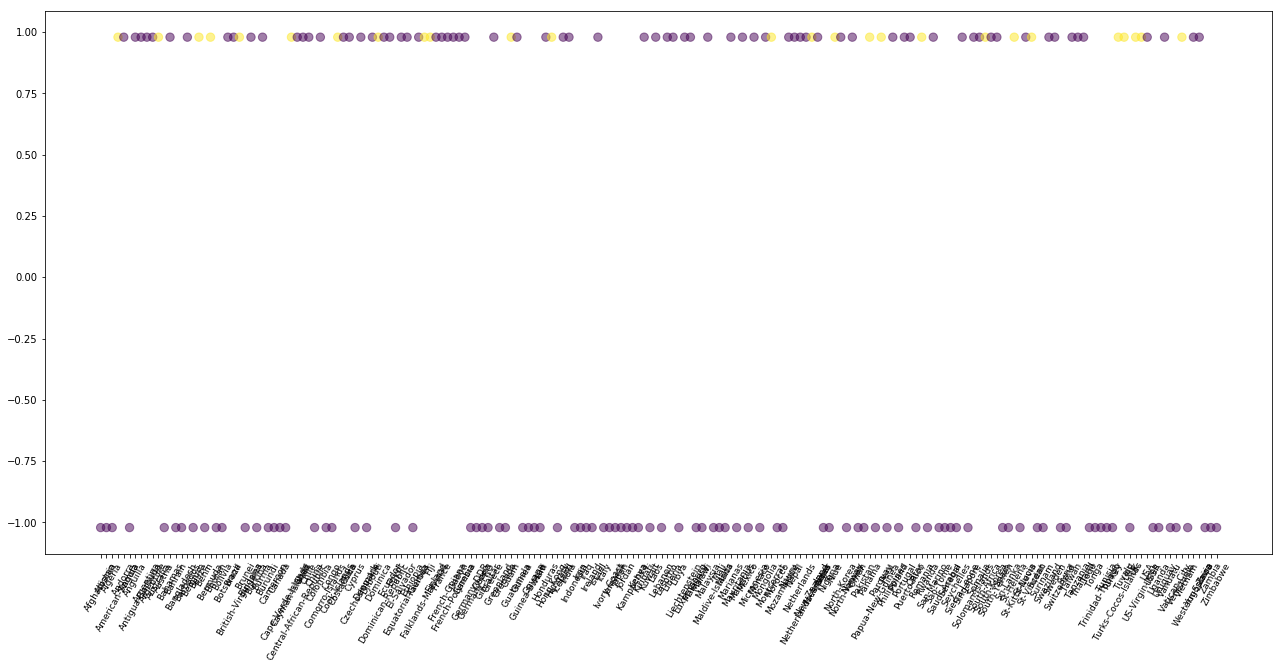

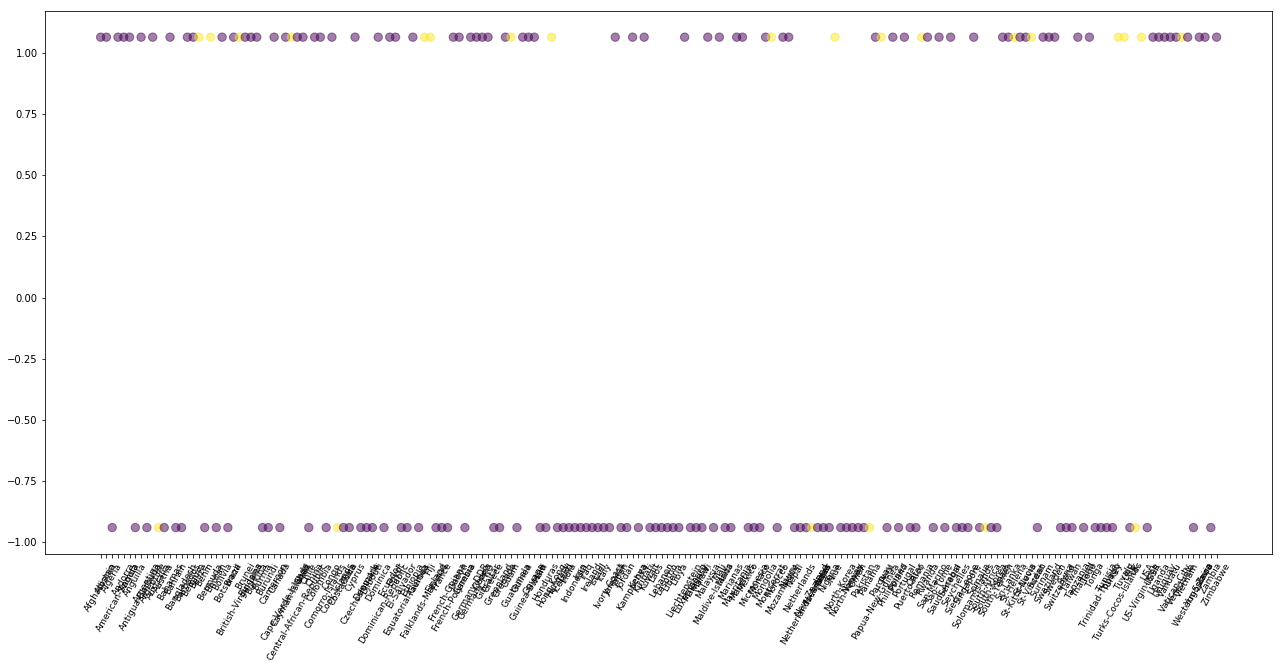

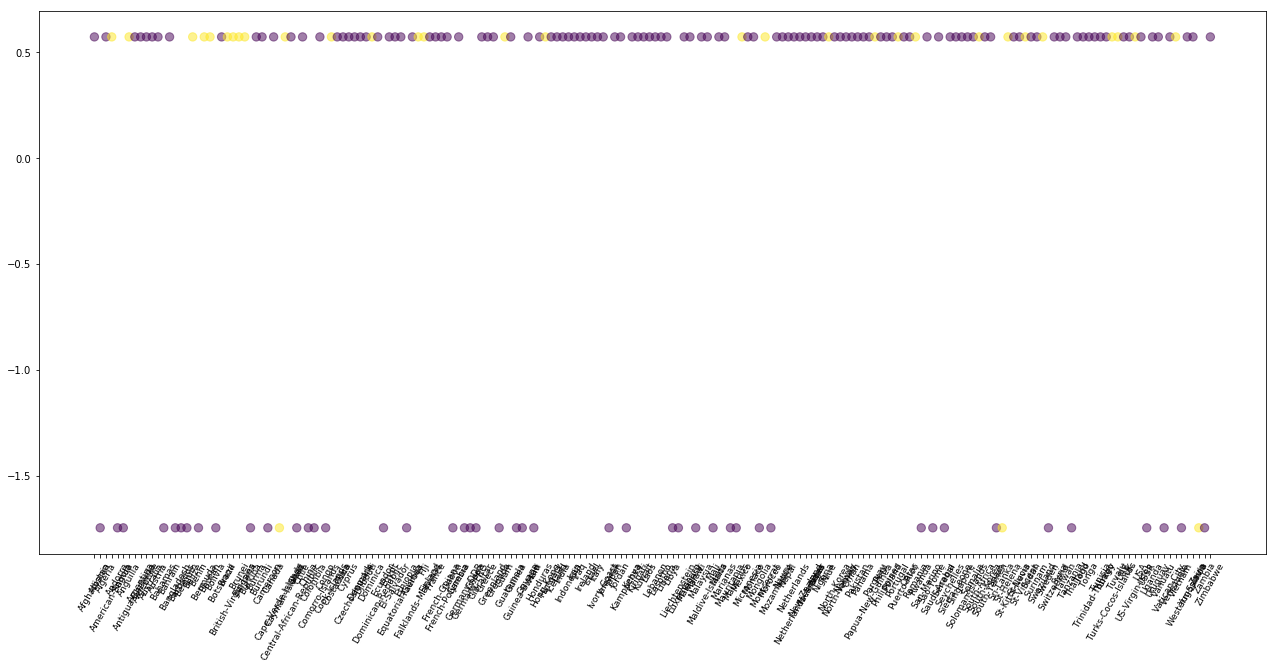

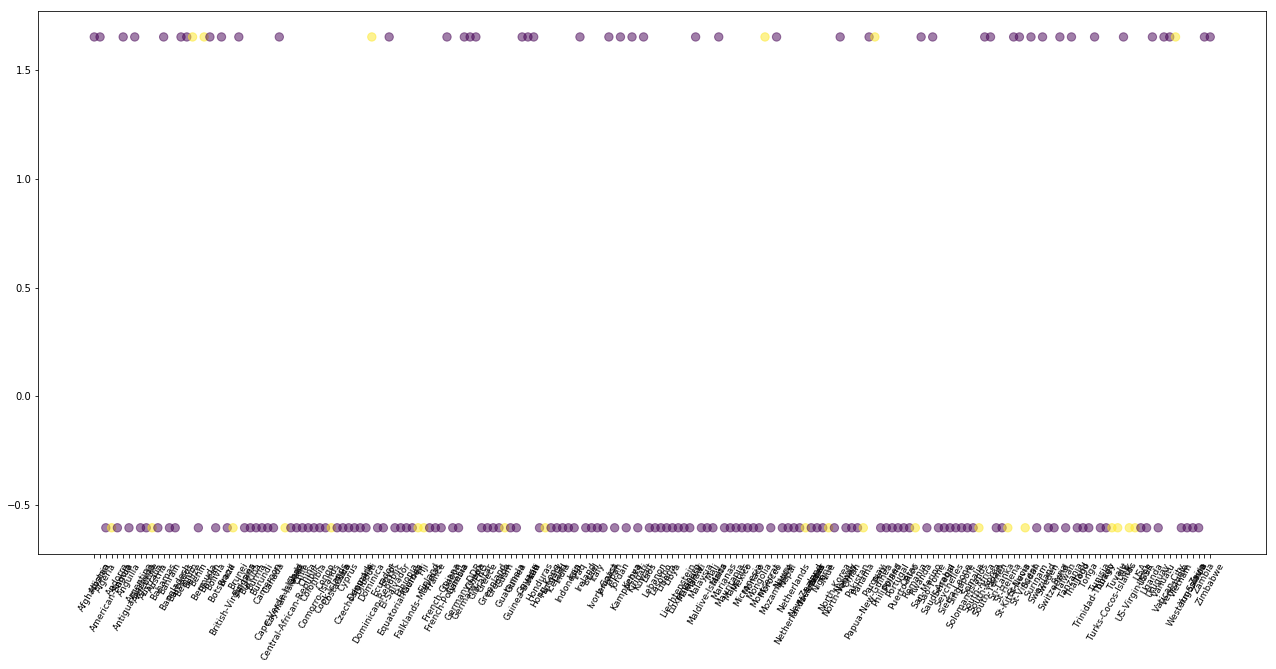

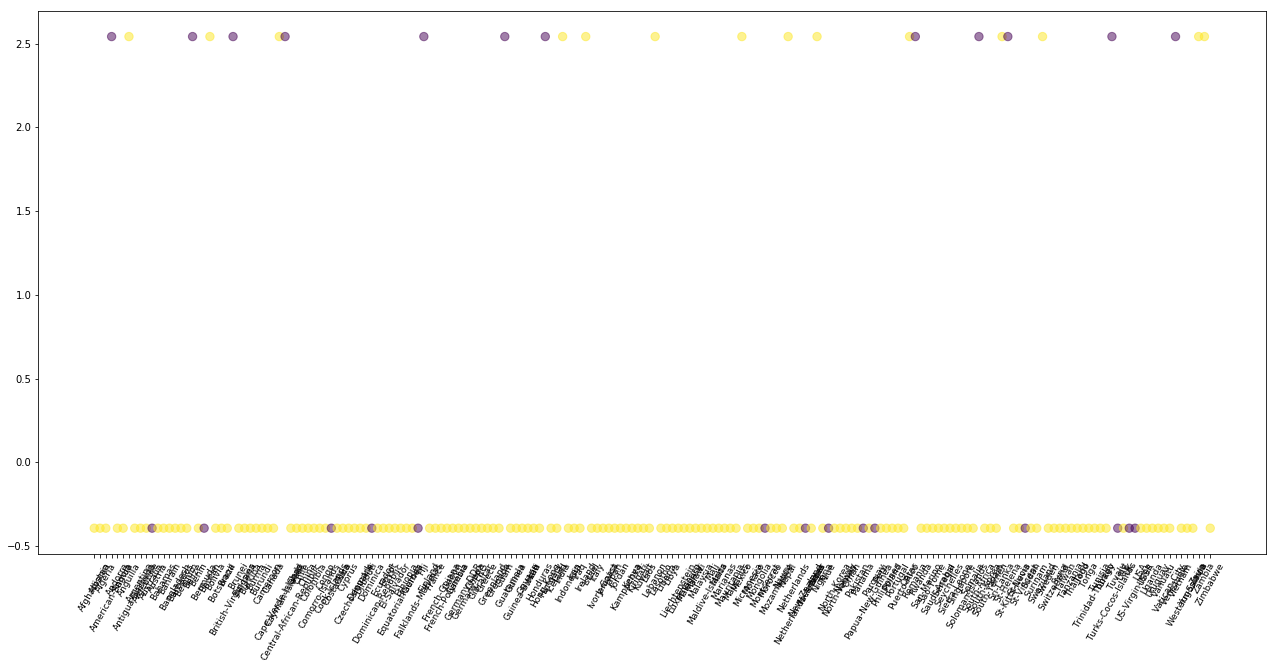

In [17]:
for i,column in enumerate(flags.columns):
    cn = flags[column].nunique()
    if cn > 15: cn = 10
    print(i)
    my_kmeans(i, cn)
    if i == 15: break

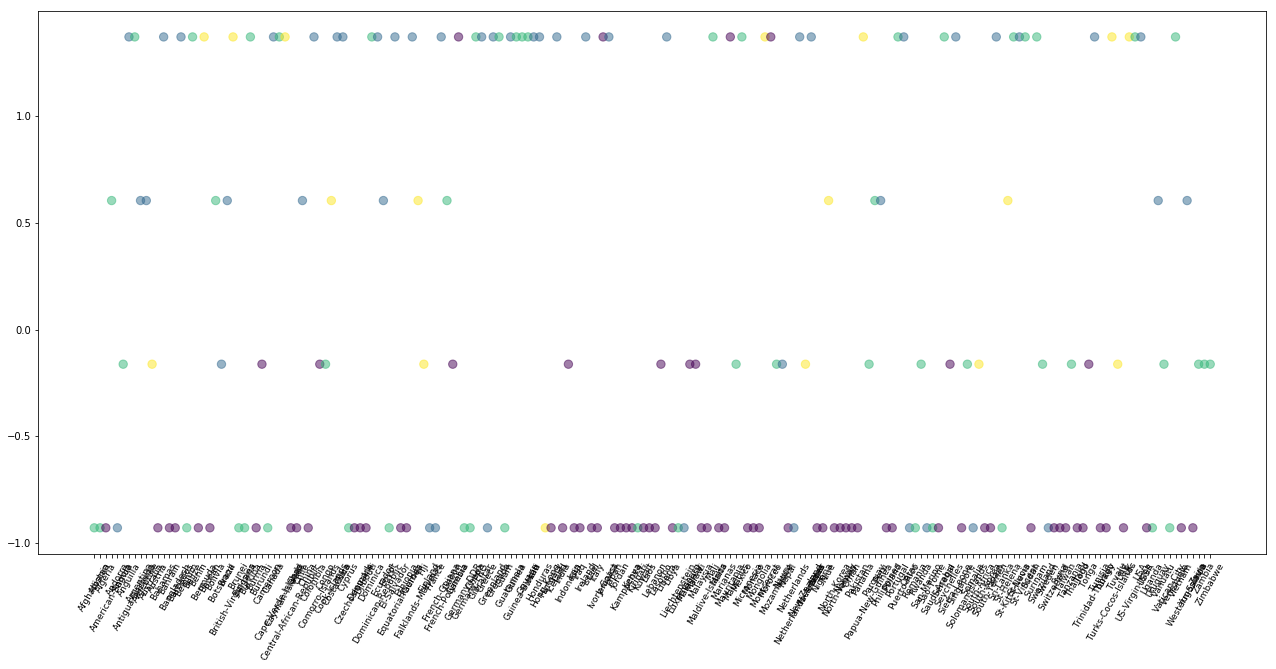

In [18]:
my_kmeans(1, 4)

## 6. Yorumlar ve Sonuç

## 7.Referanslar

http://archive.ics.uci.edu/ml/datasets/Flags

http://archive.ics.uci.edu/ml/machine-learning-databases/flags/

http://scikit-learn.org/stable/modules/clustering.html#clustering

http://scikit-learn.org/stable/modules/clustering.html#k-means

http://scikit-learn.org/stable/modules/clustering.html#dbscan

http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering